# Problem 1

## Part 1
We can consider S = span{v1, v2, v3, v4}. The explanations are printed
out with the answers below

In [2]:
import sympy
from scipy import linalg
import numpy as np
import scipy

In [41]:
# Setup Problem
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
A = np.column_stack((v1, v2, v3, v4))

# Create a vector inside S different from v1, v2, ...
s = np.add(np.add(2 * v1, 2 * v2), np.add(2 * v3, 2 * v4))
print("A vector in S that is not any of the given vectors is: {}".format(s))
print("")

# Create a vector not in S
print("Any vector x with dim(x) > 4 is not in S")
print("For example, x = [1, 1, 1, 1, 1]")
print("")

# Create a vector x perpendicular to S.
# (any vector u s.t. v1 dot u, v2 dot u, ... etc are all equal to zero)
A_transpose = sympy.Matrix(A.T)
null_A = A_transpose.nullspace()
null_A_ = np.array(null_A)
#print(null_A_.T)
print("Null(A^T) = {}".format(null_A_.T))
# x = some vector orthogonal to S
b = np.ones(2)
x = np.dot(null_A_.T , b)
x = np.array(x, dtype="int")
print("A vector perpendicular to S is any vector in Null(A^T)")
print("So any linear combination, for instance: {}".format(x))

A vector in S that is not any of the given vectors is: [ 8 36 24 52]

Any vector x with dim(x) > 4 is not in S
For example, x = [1, 1, 1, 1, 1]

Null(A^T) = [[-3 -2]
 [0 -1]
 [1 0]
 [0 1]]
A vector perpendicular to S is any vector in Null(A^T)
So any linear combination, for instance: [-5 -1  1  1]


The answer to the question $u \in S$ for some new vector u is equivalent to asking <br></br>
if there is a solution to $Ax\,=\,u$ . This can be solved using numpy or by hand with row reduction.

## Part 2

Find the dimension of the subspace S.

In [35]:
dim = np.linalg.matrix_rank(A)
print(dim)

2


## Part 3

Construct an orthonormal basis. Notice only two vectors are <br></br>
required because the dimension of S is only 2.

In [36]:
vectors = []
vectors.append(v1)
vectors.append(v3)
vectors.append(v2)
vectors.append(v4)
vectors = np.array(vectors)
#sympy.Matrix(vectors).rref()
vectors = vectors.T
orth = scipy.linalg.orth(vectors)
print(orth)
print(np.dot(orth[:,0], orth[:,1]))

[[-0.1098991   0.2669373 ]
 [-0.54396107 -0.53613402]
 [-0.32969731  0.80081189]
 [-0.76375927 -0.00225943]]
7.502679033599691e-17


## Part 4
<body>
   <p>
        We are asked to solve
   </p>
   <p>
        $$\min_{x\in S} \|\pmb{x}-\pmb{z}^{*}\|_2 $$
        $$\Rightarrow \min_{x\in S} \sqrt{(\sum_{i}^{n} x_i \, - \, (1,0,0,0)^{T})^{2}}$$
        $$\Rightarrow \min_{x\in S} (\sum_{i}^{n} x_i \, - \, (1,0,0,0)^{T})^{2}$$
   </p>
   <p>
        This is a convex function, so we set the derivative and set it equal to 0:
   </p>
   <p>
        $$\sum_i^n (x_i - (1,0,0,0)^{T}) = 0$$
        $$\Rightarrow \sum_i^n x_i = (1,0,0,0)^{T}$$
   </p>
   <p>
        Obviously we want $\pmb{x} = \pmb{z}^{*}$
   </p>
   <p>
        Since $\pmb{z}^* \notin S$ ,this becomes equivalent to finding the shortest distance to $\pmb{z}^*$ from our subspace.
   </p>
   <p>
        We find this distance by projecting the vector $\pmb{z}^*$ onto S:
   </p>
        
    
</body>

In [37]:
min_dist = np.zeros(4)
z_star = np.array([1, 0, 0, 0])
col_1 = np.dot(orth[:,0], z_star)
col_2 = np.dot(orth[:,1], z_star)
min_dist = np.add(col_1, col_2)
print("The minimum distance is: {}".format(min_dist))

The minimum distance is: 0.15703819557191717


In [38]:
# Project u onto v
#def proj(u, v):
    #assert type(u) && 
#    assert type(v) == np.ndarray, "Invalid input"
#    a = (np.dot(u, v))/(np.dot(u,u))
#    w = a * v
#    return w

#z_star = sympy.Matrix(z_star)
#space = sympy.Matrix(orth)
#print(orth.shape[:][0])
#print(z_star.T.shape)
#space.project(z_star_)
#min_dist = np.add(proj(z_star, orth[:][i]), min_dist)

## Problem 2

### Part 1 Most Common Words

In [118]:
import requests as req
from bs4 import BeautifulSoup
from urllib.request import urlretrieve,urlopen
import PyPDF2
import io
import pdfminer
import os
import numpy as np
import nltk
from math import log2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import re
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [3]:
#getting html from http://proceedings.mlr.press/v70/
html_content = req.get("http://proceedings.mlr.press/v70/").content
content = BeautifulSoup(html_content,'html.parser')

#getting all the links
links_pdf =[]

#getting all the classes with id links
links_paper = content.find_all(class_="links")

#iterate over all the classes obtained and get link and keep only pdf links
for link_paper in links_paper:
    links = link_paper.find_all('a')
    links_pdf.append(links[1].get('href'))
    
i=0

for link_pdf in links_pdf:   
    content=urlopen(link_pdf).read()
    i = i+1
    filename = str(i)+".pdf"
    fout=open(filename, "wb")
    fout.write(content)
    fout.close()
print("downloaded {} files".format(i))

downloaded 434 files


In [15]:
# function to convert text from pdf
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text


In [73]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/humble-
[nltk_data]     fool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/humble-
[nltk_data]     fool/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
path = '/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lab3/src/'

data_list = []
for i in range(1,435):
    # loads the pdf and sends it to the function ofr conversion
    print(i)
    t = convert_pdf_to_txt(path+str(i)+".pdf")
    t_lower = t.lower()
    ## tokenizes and removes punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(t_lower)
    
    #another filter to remove stop words
    filtered_tokens = tokens[:]
    for token in tokens: 
        if token in stopwords.words('english'): 
            filtered_tokens.remove(token)
    #another filter to remove unnecessary element of length lesser than three
    
    
    count_filter = []
    for token in filtered_tokens:
        if (len(token) >=3):
            count_filter.append(token)
    data_list.append(count_filter)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


KeyboardInterrupt: 

In [80]:
print(len(data_list))
print(len(data_list[50]))

200
2888


In [82]:
## pdf number 201 didn't load for some reason

path = '/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lab3/src/'

for i in range(202,435):
    # loads the pdf and sends it to the function ofr conversion
    print(i)
    t = convert_pdf_to_txt(path+str(i)+".pdf")
    t_lower = t.lower()
    ## tokenizes and removes punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(t_lower)
    
    #another filter to remove stop words
    filtered_tokens = tokens[:]
    for token in tokens: 
        if token in stopwords.words('english'): 
            filtered_tokens.remove(token)
    #another filter to remove unnecessary element of length lesser than three
    
    
    count_filter = []
    for token in filtered_tokens:
        if (len(token) >=3):
            count_filter.append(token)
    data_list.append(count_filter)


202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434


In [84]:
print(len(data_list))

433


In [87]:
one_list = []
for data in data_list:
    one_list = one_list+data
print(len(one_list))

1648762


In [91]:
most_common_words= [word for word, word_count in Counter(one_list).most_common(10)]
print (most_common_words)

['cid', 'learning', 'model', 'data', 'algorithm', '2016', '107', 'set', 'function', '2015']


### Part 2 Estimate the Entropy

In [125]:
## randomly choosing a list corresponding to an ICML paper
rand_list = np.random.choice(data_list)
rand_word = np.random.choice(rand_list)
freq =0
for word in rand_list:
    if word == rand_word:
        freq+=1

prob = freq/len(rand_list)
entropy = -(prob*log2(prob)+(1-prob)*log2(1-prob))

print(entropy)


## need to figure out the entropy formula they want


0.0012351778656126482
0.013714018232625748


### Part 3 Random Paragraph

In [105]:
unique_words = set(one_list)
corresponding_prob = []

for word in unique_words:
    #calculate number of occurences
    num_occurences = one_list.count(word)
    #calc prob
    probability = num_occurences/len(one_list)
    corresponding_prob.append(probability)
    


In [104]:
print(len(corresponding_prob))

131


In [113]:
a = np.random.choice(one_list, 500, corresponding_prob)
para = ""
for word in a:
    para = para +word
    para += " "

In [114]:
print(para)

lan sition ieee increase riemannian iot note nfsic abilistic matrix tion getting ference values com 150 clustering method pretrained provide special exactly aaai cid node sketching dhillon inte decision method convex procedure component single single rui assume value generative matrix set orthogonal leads cid geoffrey reconstruct evaluation nips iteration log xeon lla setting agreement ods similar recommended interest family mode rate range suffer deﬁnite submodular view models davis feature gist 03071 set tranining trained label 2015 every learn cid thought 2009 bound various convergence ali small list cid otherwise binary statistics 2google prove sub information support wise gulwani 2000 aim seds tree decomposable speciﬁc requirements mining tion small michael parameters sub research via exam vectors electricity case contributions connection max1 compared cross theory fully coming generate arxiv visualize formed set caglar formulation large pdhg stochastic 2011 bch gradient model kal

## Problem 3

### Part 2 Following the tutorial

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [38]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

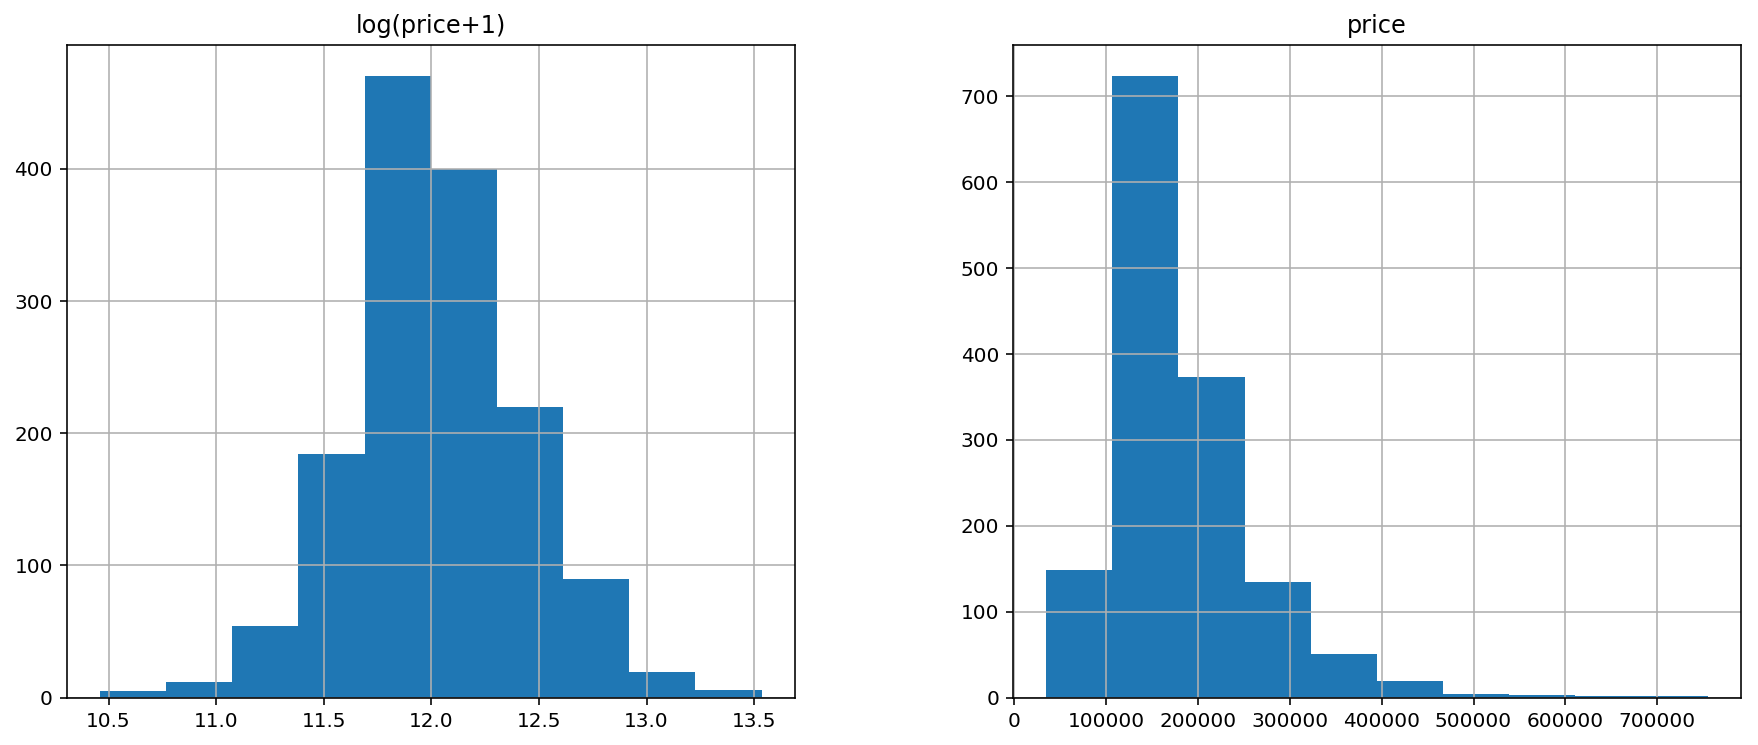

In [39]:
matplotlib.rcParams['figure.figsize'] = (15.0, 6.0)
prices = pd.DataFrame({'price':train["SalePrice"],"log(price+1)":np.log1p(train["SalePrice"])})
_ = prices.hist()

In [40]:
train['SalePrice'] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[(all_data.dtypes != 'object')].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats>0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice

In [41]:
model = Ridge(alpha = 0.1)
model.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
arr = np.expm1(model.predict(X_test))
pd.DataFrame(arr).to_csv("kaggle_results.csv")

In [43]:
rmse_train = sqrt(mean_squared_error(model.predict(X_train), y_train))
print("The training RMSE is: {}".format(rmse_train))

The training RMSE is: 0.09211955585640522


### Part 3 Trying a different model

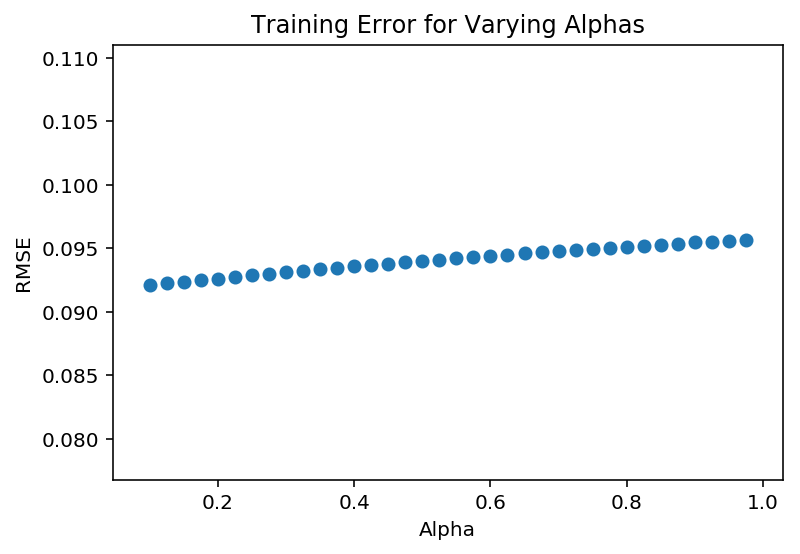

In [72]:
# Naive model- find best training error

X_train = np.array(X_train)
y_train = np.array(y_train)
alphas = np.arange(0.1, 1, 0.025)
rmses = []

for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    rmse_train = sqrt(mean_squared_error(model.predict(X_train), y_train))
    rmses.append(rmse_train)
    
_ = plt.scatter(alphas, rmses)
_ = plt.title("Training Error for Varying Alphas")
_ = plt.ylabel("RMSE")
_ = plt.xlabel("Alpha")

The alpha we chose originally has the lowest training error. Without cross-validation, this is the best ridge regression we can choose. 